In [1]:

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy.stats import ks_2samp, chi2_contingency



In [2]:
DB_PATH = "D:/Downloadss/result/data.sqlite"  # Update with your actual path if needed
TABLE_NAME = "merged_output"
SELECTED_COLS = [
    "latitude", "longitude", "speed_kmh", "acceleration", "deceleration",
    "acceleration_y", "screen_on", "screen_blocked", "safe_score"
]
BASELINE_PATH = "baseline_stats.json"

In [3]:
conn = sqlite3.connect(DB_PATH)
df = pd.read_sql_query(f"SELECT {', '.join(SELECTED_COLS)} FROM {TABLE_NAME}", conn)
conn.close()


In [4]:
df = df.apply(pd.to_numeric, errors='coerce')

    # --- BASIC STATS & MISSING VALUES ---
print("📊 Basic Summary Statistics:")
print(df.describe())

print("\n❗ Missing Values:")
print(df.isnull().sum())


📊 Basic Summary Statistics:
          latitude    longitude    speed_kmh  acceleration  deceleration  \
count  4550.000000  4550.000000  4550.000000  4.550000e+03  4.550000e+03   
mean     18.594419    73.728769    12.868642  4.673740e-02  4.584939e-01   
std       0.008950     0.020975    13.033934  2.816036e-01  2.762531e+00   
min      18.583895    73.699596     0.000000 -1.467516e+00 -1.439633e+01   
25%      18.588740    73.703670     1.439090 -2.431009e-02 -2.384820e-01   
50%      18.591184    73.727826     8.830894 -4.318736e-08 -4.236680e-07   
75%      18.595394    73.749644    21.257173  1.681472e-02  1.649524e-01   
max      18.617543    73.769807    99.757549  1.707937e+00  1.675486e+01   

       acceleration_y    screen_on  screen_blocked   safe_score  
count    4.550000e+03  4550.000000     4550.000000  4550.000000  
mean    -3.411485e-02     0.021099        0.978022    31.931670  
std      1.823390e-01     0.143730        0.146628    32.532279  
min     -1.482879e+00  

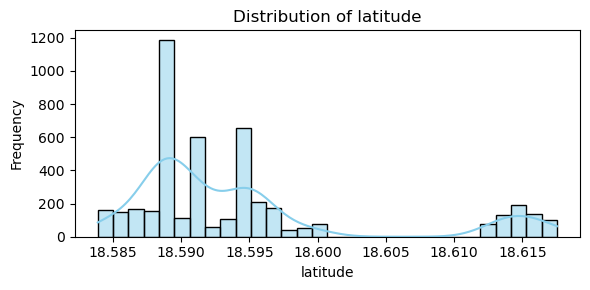

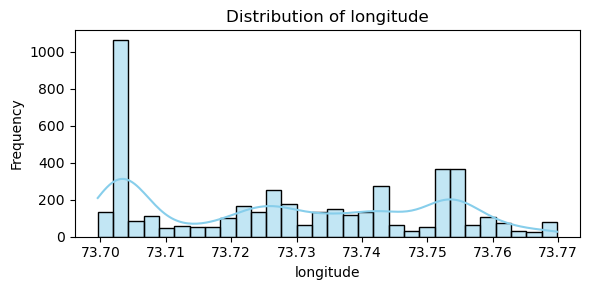

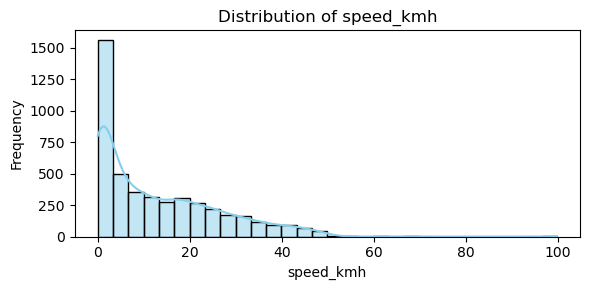

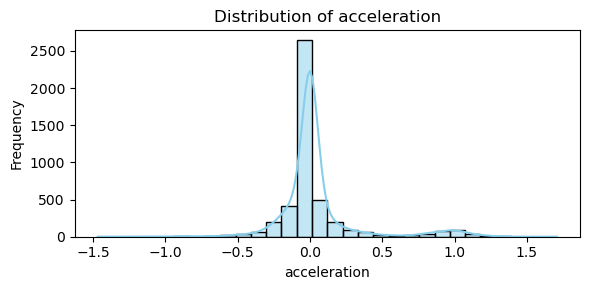

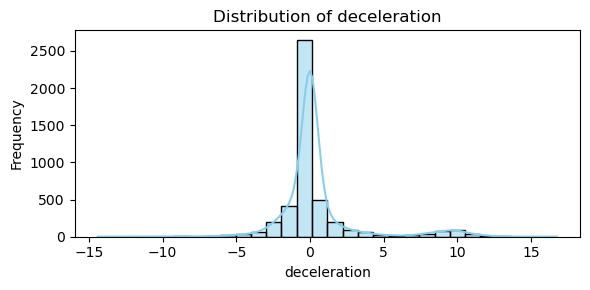

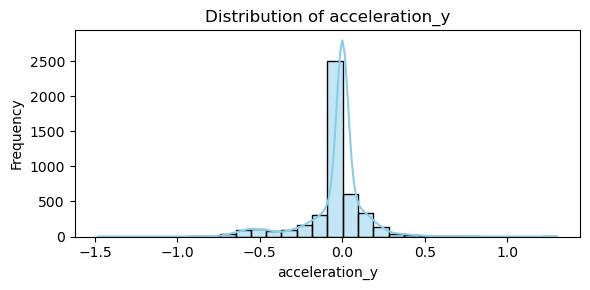

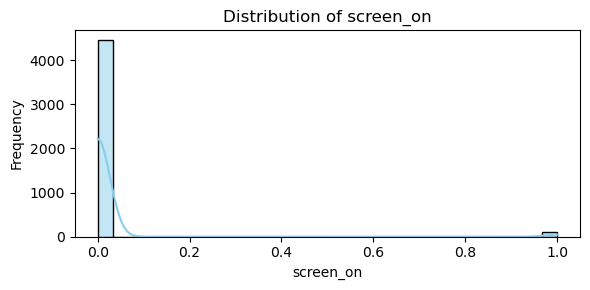

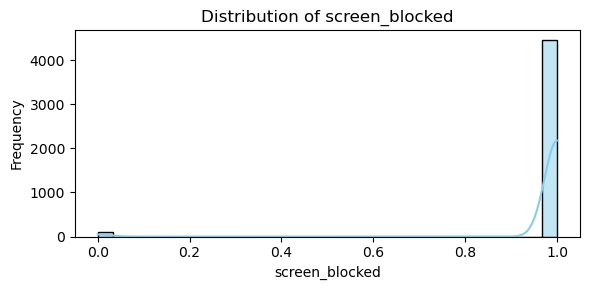

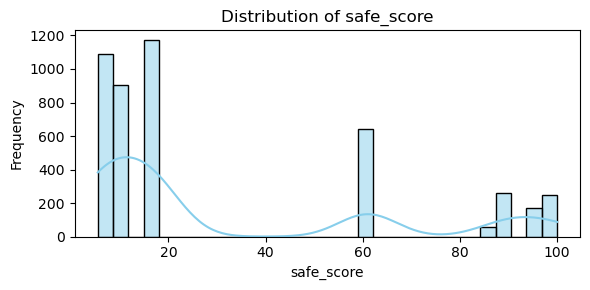

In [5]:
for col in SELECTED_COLS:
        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], kde=True, bins=30, color="skyblue")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

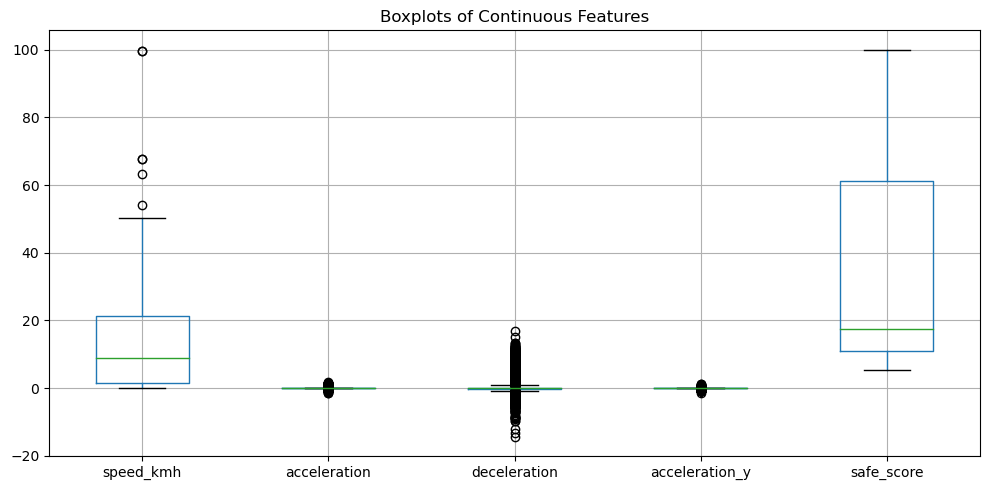

In [7]:
    # 1️⃣ Boxplots for continuous features
subset_cols = ["speed_kmh", "acceleration", "deceleration", "acceleration_y", "safe_score"]
plt.figure(figsize=(10, 5))
df[subset_cols].boxplot()
plt.title("Boxplots of Continuous Features")
plt.tight_layout()
plt.show()


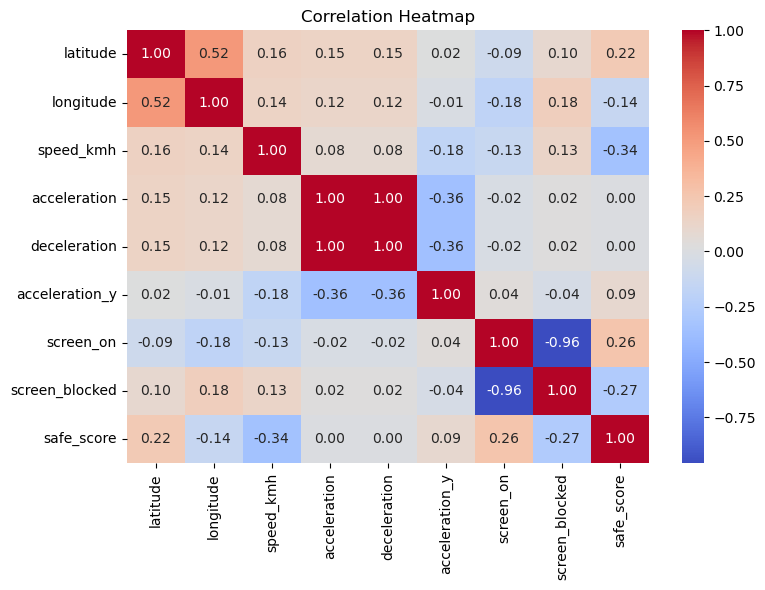

In [8]:
    # 2️⃣ Correlation Matrix Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


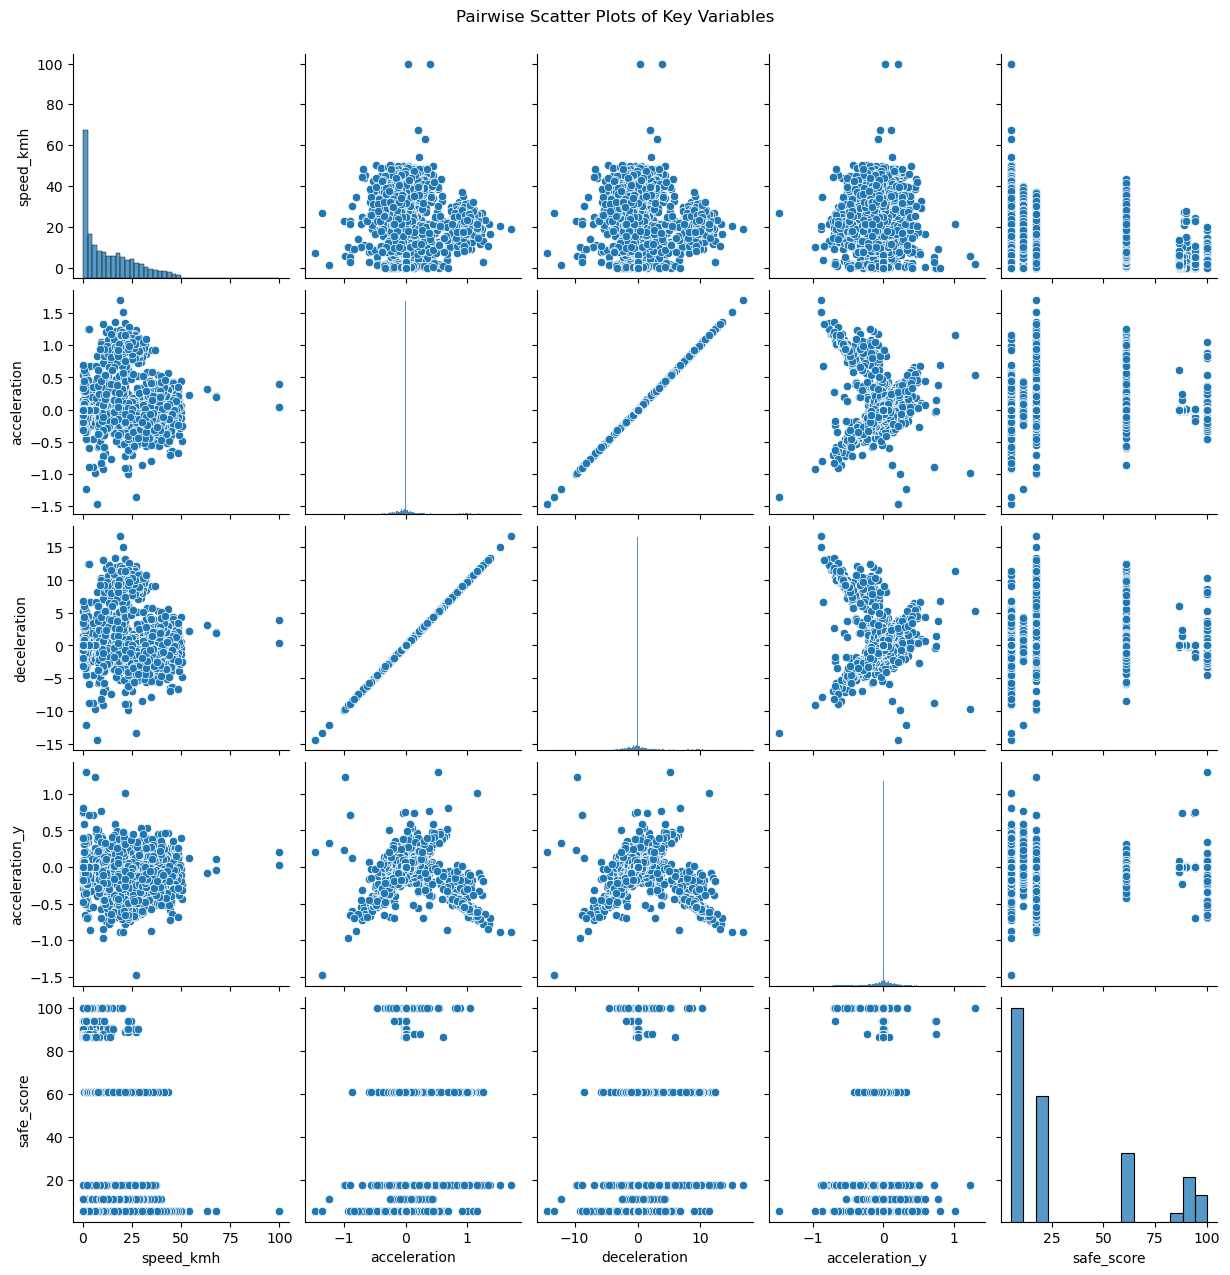

In [9]:
    # 3️⃣ Pairwise Scatter Plots
sns.pairplot(df[subset_cols].dropna())
plt.suptitle("Pairwise Scatter Plots of Key Variables", y=1.02)
plt.show()

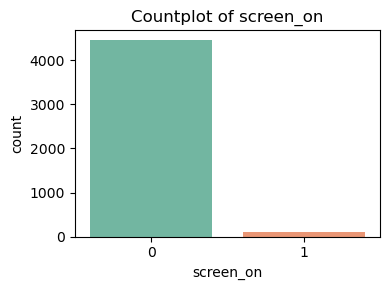

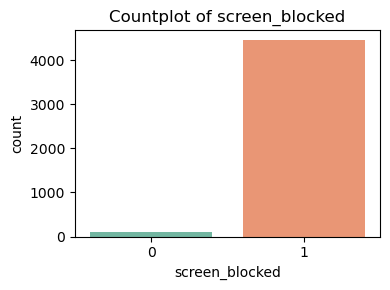

In [10]:
   # 4️⃣ Countplots for binary features
for col in ["screen_on", "screen_blocked"]:
        plt.figure(figsize=(4, 3))
        sns.countplot(data=df, x=col, palette="Set2")
        plt.title(f"Countplot of {col}")
        plt.tight_layout()
        plt.show()

In [12]:
print("\n🔍 Final Dataset Shape:", df.shape)
print("\n Final Missing value summary")
print(df.isnull().sum())


🔍 Final Dataset Shape: (4550, 9)

 Final Missing value summary
latitude          0
longitude         0
speed_kmh         0
acceleration      0
deceleration      0
acceleration_y    0
screen_on         0
screen_blocked    0
safe_score        0
dtype: int64
